In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DIS', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT',
    'FTNT', 'GH', 'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG', 'JD',
    'LRCX', 'LSPD', 'LULU', 'MA', 'MASI', 'MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NET', 'NVCR', 'NVDA', 'ODFL', 'OKTA', 'OPEN',
    'PAC', 'PANW', 'PAYC', 'PINS', 'PTON', 'PYPL', 'QDEL', 'RBLX',
    'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU', 'RVLV', 'SAM', 'SBUX',
    'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TSCO',
    'TSLA', 'TTD', 'TTWO', 'TWLO', 'TWTR', 'TYL', 'UPST', 'VEEV',
    'VLD', 'VRTX', 'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'AGI', 'AMRK', 'APT', 'BTTR', 'CENN', 'CVE', 'DTST', 'EP',
    'FCUV', 'FKWL', 'FSI', 'GCBC', 'GGE', 'GME', 'HBM', 'IDR',
    'INTZ', 'KREF', 'LFMD', 'MCVT', 'MIY', 'MNMD', 'MOBQ', 'PACB',
    'PETV', 'POWW', 'PRPH', 'RVP', 'RVYL', 'SOBR', 'VIRT', 'WAVD',
    'WKHS', 'ZEST', 'ZYXI']
BEST_WEIGHTED = [
    'ABST', 'AMEH', 'BYRN', 'CEF', 'CGAU', 'CIZN', 'CTGO', 'DYAI',
    'FNV', 'HMY', 'HNRG', 'IEI', 'MICS', 'MICT', 'MMU', 'MNP', 'MTA',
    'MUE', 'NAN', 'OMQS']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)

85

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-11-24', datetime.date(2022, 11, 24))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  143 of 143 completed
Generating derived columns...
AAPL... ABMD... ABNB... ABST... ACN... ADBE... ADYEY... AGI... AMD... AMEH... AMGN... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BTTR... BYND... BYRN... CEF... CENN... CGAU... CHWY... CIZN... CRWD... CTGO... CVE... DDOG... DIS... DOCS... DOCU... DTST... DUOL... DYAI... EDIT... EP... ETSY... FCUV... FKWL... FLGT... FNV... FSI... FTNT... GCBC... GGE... GH... GME... GMED... GOOG... HBM... HMY... HNRG... IDR... IDXX... IEI... INTG... INTZ... ISRG... JD... KREF... LFMD... LRCX... LSPD... LULU... MA... MASI... MCVT... MDB... MELI... MICS... MICT... MIY... MMU... MNMD... MNP... MNST... MOBQ... MSFT... MTA... MTCH... MUE... NAN... NET... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PAYC... PETV... PINS... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RGEN... RIVN... RMD... ROKU... RVLV... RVP... RVYL... SAM... SBUX... SE... SHOP... SNOW... SOBR.

In [5]:
data['Date'].tail()

2513   2022-11-17
2514   2022-11-18
2515   2022-11-21
2516   2022-11-22
2517   2022-11-23
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.994773
2       1.007856
3       1.004270
4       1.000163
5       0.995255
          ...   
2513    0.996911
2514    1.004759
2515    0.996116
2516    1.013580
2517    1.005915
Name: ^GSPC, Length: 2517, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.001362
2,1.010428
3,1.012524
4,1.003534
5,1.000199
...,...
2513,1.000806
2514,1.007096
2515,1.003567
2516,1.019759


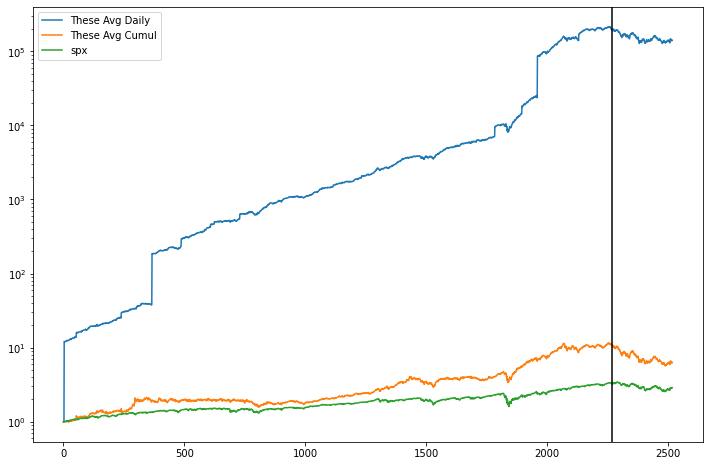

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-11-26,NaN,NaN
1,2012-11-27,0.986059,0.986059
2,2012-11-28,0.999149,0.999609
3,2012-11-29,0.999097,0.995761
4,2012-11-30,12.087927,1.004820


In [10]:
out.tail()

,Date,mine1,mine2
2513,2022-11-17,141870.200802,6.329675
2514,2022-11-18,141370.844060,6.285375
2515,2022-11-21,139339.750104,6.156053
2516,2022-11-22,139820.833027,6.194883
2517,2022-11-23,141683.417557,6.308736


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

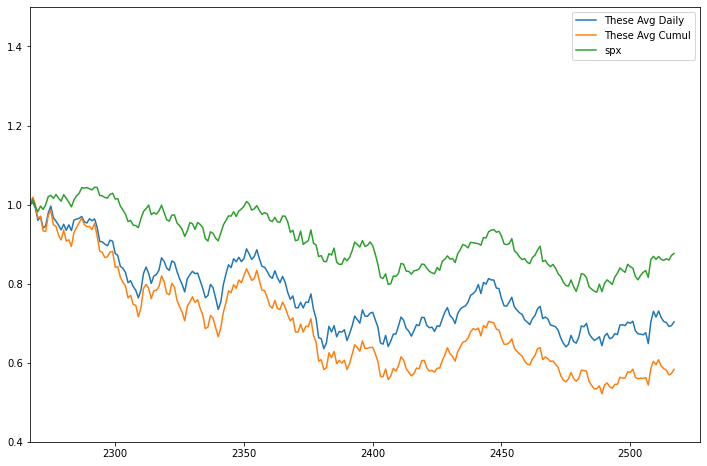

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2458,62.000000,62.000000,64.330002,61.200001,62.009998,4.127134,0.999839,0.994546,0.994706
2459,61.320000,61.320000,61.570000,58.646000,60.709999,4.116106,1.010048,0.989032,0.979194
2460,59.930000,59.930000,61.889999,59.200001,61.500000,4.093177,0.974472,0.977332,1.002935
2461,58.419998,58.419998,59.240002,56.970001,58.250000,4.067658,1.002918,0.974804,0.971967
2462,58.830002,58.830002,59.160000,55.759998,56.970001,4.074652,1.032649,1.007018,0.975180


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2458,62.000000,62.000000,64.330002,61.200001
2459,61.320000,61.320000,61.570000,58.646000
2460,59.930000,59.930000,61.889999,59.200001
2461,58.419998,58.419998,59.240002,56.970001
2462,58.830002,58.830002,59.160000,55.759998


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2458,62.000000,62.000000,64.330002,61.200001,61.570000,58.646000,0.993065,0.945903
2459,61.320000,61.320000,61.570000,58.646000,61.889999,59.200001,1.009295,0.965427
2460,59.930000,59.930000,61.889999,59.200001,59.240002,56.970001,0.988487,0.950609
2461,58.419998,58.419998,59.240002,56.970001,59.160000,55.759998,1.012667,0.954468
2462,58.830002,58.830002,59.160000,55.759998,60.130001,57.029999,1.022098,0.969403


0.05    0.972145
Name: HighMult, dtype: float64


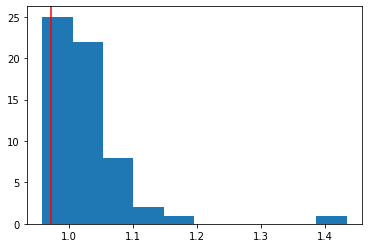

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0333289462294004


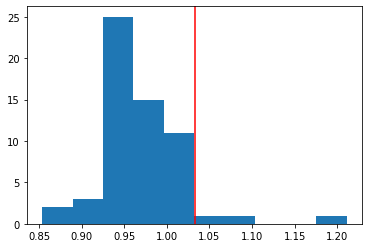

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0333289462294004, 0.9721450402691196)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0128013800734783, 0.9845593740180999)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2458,62.000000,62.000000,64.330002,61.200001,61.570000,58.646000,0.993065,0.945903,0
2459,61.320000,61.320000,61.570000,58.646000,61.889999,59.200001,1.009295,0.965427,0
2460,59.930000,59.930000,61.889999,59.200001,59.240002,56.970001,0.988487,0.950609,0
2461,58.419998,58.419998,59.240002,56.970001,59.160000,55.759998,1.012667,0.954468,0
2462,58.830002,58.830002,59.160000,55.759998,60.130001,57.029999,1.022098,0.969403,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0055316911571786,
 0.9776150876523455,
 1.0438961371366422,
 0.9726244207526126)

In [27]:
get_hilo_mults(aapl)

(1.0112265587343854, 0.9907236045376774, 1.012944156424096, 0.9844625846657633)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=[
        'stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
        'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.011227,0.990724,1.012944,0.984463
1,ABMD,1.001346,0.996071,1.020173,0.994584
2,ABNB,1.000603,0.988603,1.023010,0.979858
3,ABST,1.005646,0.994622,1.002386,0.995448
4,ACN,1.005416,0.988000,1.014890,0.993830


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,151.070007,AAPL
ABMD,377.779999,ABMD
ABNB,96.629997,ABNB
ABST,10.2,ABST
ACN,294.529999,ACN
...,...,...
ZM,76.139999,ZM
ZYXI,13.84,ZYXI
^GSPC,4027.26001,^GSPC
^IXIC,11285.317383,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.011227,0.990724,1.012944,0.984463,151.070007
1,ABMD,1.001346,0.996071,1.020173,0.994584,377.779999
2,ABNB,1.000603,0.988603,1.023010,0.979858,96.629997
3,ABST,1.005646,0.994622,1.002386,0.995448,10.2
4,ACN,1.005416,0.988000,1.014890,0.993830,294.529999


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv